In [61]:
from PIL import Image, ImageEnhance, ImageFilter, ImageDraw, ImageOps
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

In [62]:
path = "Raw dataset/AGAR_representative/higher-resolution/bright/734.jpg"
#path = "Raw dataset/MicrobIA_Dataset_only_counted_processed_anonimyzer_sample/S/T0h_4h/IMG_Niguarda1_936_129_F6_T975.png"
img = Image.open(path)
img.show()

In [63]:
img = img.convert("L")
enhancer = ImageEnhance.Contrast(img)
img = enhancer.enhance(1.75)
img = img.filter(ImageFilter.FIND_EDGES)
img.show()

In [64]:
cx, cy = ndi.center_of_mass(np.array(img))
print(cx, cy)

2005.2105983326753 2052.4141660947


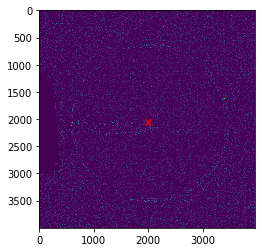

In [65]:
plt.imshow(np.array(img))
plt.scatter(cx, cy, c="red", marker="x")

1947.5858339053002
[58, 105, 3953, 4000]
1752.8272505147702
[252, 300, 3758, 3805]
1772.3031088538232
[233, 280, 3778, 3825]
331067304


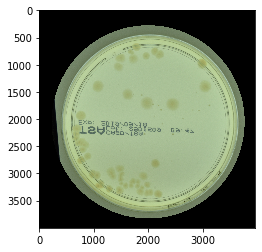

In [66]:
dist_to_side = min(cx, cy, img.size[0]-cx, img.size[1]-cy)
for x in range(5):
    
    boundingBox = [0, 0, 0, 0]
    print(dist_to_side)
    boundingBox[0] = round(cx-dist_to_side)
    boundingBox[1] = round(cy-dist_to_side)
    boundingBox[2] = round(cx+dist_to_side)
    boundingBox[3] = round(cy+dist_to_side)
    print(boundingBox)

    mask = Image.new('L', img.size, 0)
    draw = ImageDraw.Draw(mask) 
    draw.ellipse(boundingBox, fill=255)

    im2 = Image.new('L', img.size)
    new_image = Image.composite(img, im2, mask)

    if np.sum(np.array(new_image))/np.sum(np.array(img)) < 0.6:
        dist_to_side += 0.1*(min(cx, cy, img.size[0]-cx, img.size[1]-cy) - dist_to_side)
    elif 0.7 < np.sum(np.array(new_image))/np.sum(np.array(img)):
        dist_to_side*=0.9
    else:
        break

im2 = Image.new('RGB', img.size)
output = Image.composite(Image.open(path), im2, mask)
print(np.sum(np.array(output)))
output.show()
plt.imshow(output)